В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [4]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

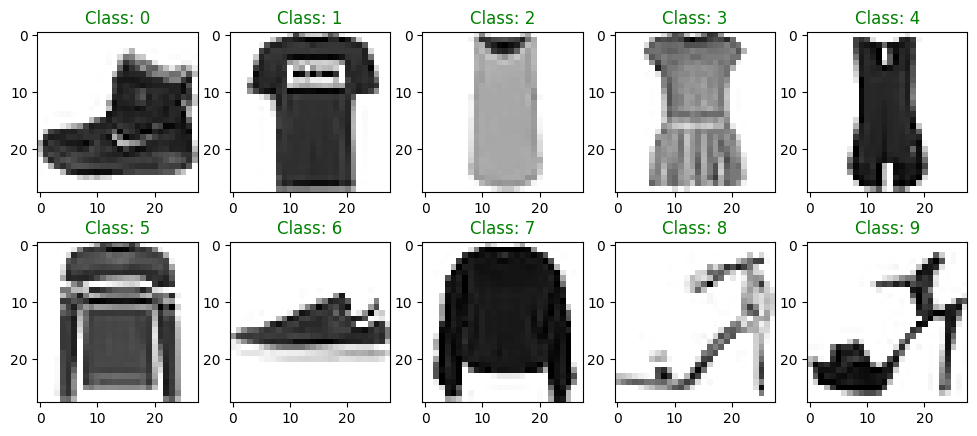

In [5]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = x_train[i]
    plt.imshow(img, cmap='binary')
    plt.title("Class: " + str(i), c='g')
plt.show()

In [7]:
model = Sequential(name='fashion_mnist')

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001), name='hidden_1'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001), name='hidden_2'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', name='output'))

In [8]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)        

In [9]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

#Train model
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=24,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Epoch 1/24
235/235 [==============================] - 84s 346ms/step - loss: 0.8109 - accuracy: 0.7425 - val_loss: 1.3511 - val_accuracy: 0.8304
Epoch 2/24
235/235 [==============================] - 80s 340ms/step - loss: 0.5654 - accuracy: 0.8356 - val_loss: 0.5910 - val_accuracy: 0.8608
Epoch 3/24
235/235 [==============================] - 79s 334ms/step - loss: 0.5050 - accuracy: 0.8593 - val_loss: 0.4430 - val_accuracy: 0.8819
Epoch 4/24
235/235 [==============================] - 78s 332ms/step - loss: 0.4653 - accuracy: 0.8723 - val_loss: 0.4336 - val_accuracy: 0.8821
Epoch 5/24
235/235 [==============================] - 82s 348ms/step - loss: 0.4362 - accuracy: 0.8816 - val_loss: 0.4047 - val_accuracy: 0.8938
Epoch 6/24
235/235 [==============================] - 78s 333ms/step - loss: 0.4171 - accuracy: 0.8868 - val_loss: 0.3887 - val_accuracy: 0.8966
Epoch 7/24
235/235 [==============================] - 81s 346ms/step - loss: 0.4006 - accuracy: 0.8914 - val_loss: 0.3726 - val_ac

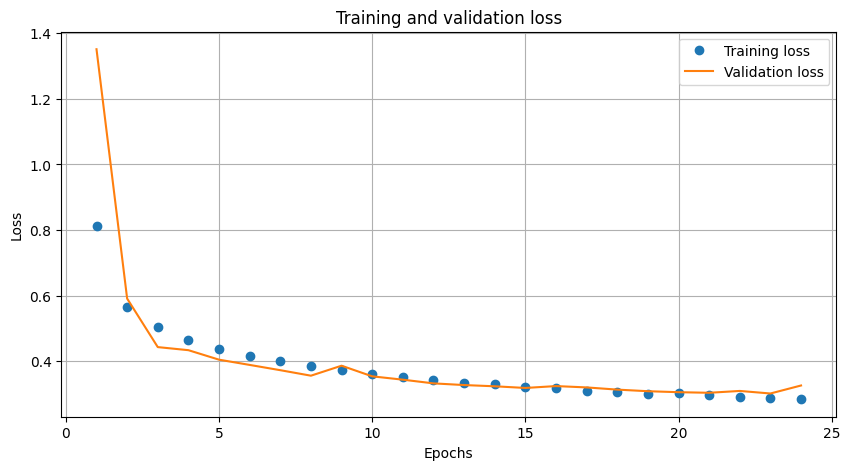

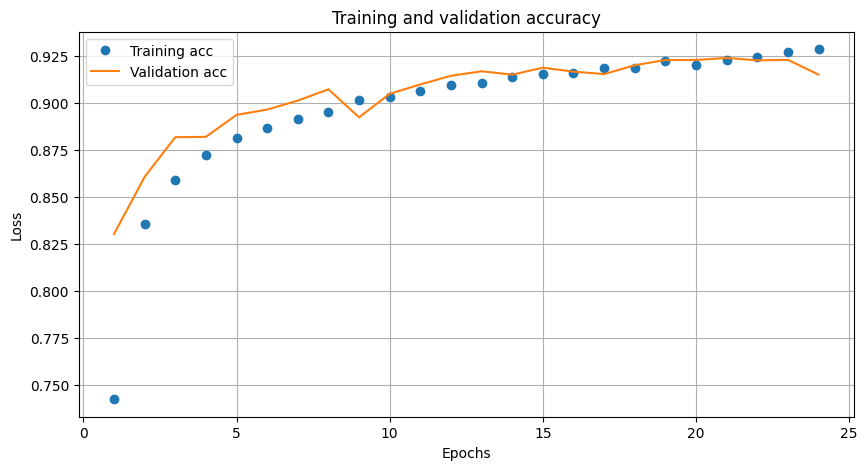

In [10]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(epochs, loss_values, 'o', label='Training loss')
plt.plot(epochs, val_loss_values,  label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, history_dict['accuracy'], 'o', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'],  label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Для обробки та класифікацції зображень, розпізнавання обєктів краще підходять згорткові мережі за рахунок того що мають здатність виявляти локальні залежності в даних.